<a href="https://colab.research.google.com/github/Zeeshan2012/Car_price_prediction-with-lasso/blob/main/car_price_prediction_with_lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/car_price_prediction/car data.csv')

In [9]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [22]:
df.value_counts()


Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

In [23]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [32]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel': 1 ,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0, 'Individual': 1}},inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic': 1}},inplace=True)

In [33]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [38]:
X = df.drop(['Car_Name','Selling_Price'],axis = 1)
y = df['Selling_Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.1,random_state = 2)

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
prediction = model.predict(X_train)

In [54]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [53]:
print([prediction])


[array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00, 

In [55]:
error_score = metrics.r2_score(prediction , y_train)

In [56]:
error_score

0.8635655509198777

ValueError: ignored

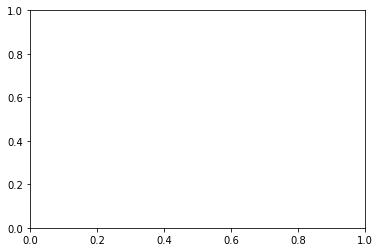

In [61]:
plt.scatter(y_train , prediction)
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.title('actual_price v\s predicted price')
plt.show()

In [59]:
prediction_test = model.predict(X_test)

In [60]:
error_score = metrics.r2_score(prediction_test , y_test)

In [63]:
error_score

0.8062199941176358

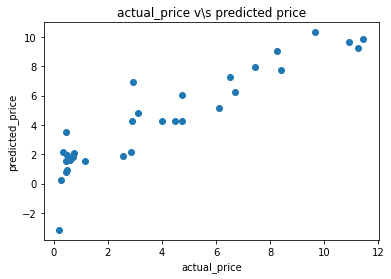

In [62]:
plt.scatter(y_test , prediction_test)
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.title('actual_price v\s predicted price')
plt.show()